In [2]:
! pip install --upgrade category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import math
df = pd.read_csv(f'drive/MyDrive/Datasets/Latest Covid-19 India Status.csv')
df.head()


Mounted at /content/drive


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,7680,5,7546,129,0.07,98.26,1.68,399001
1,Andhra Pradesh,2072446,2158,2055856,14432,0.10,99.20,0.70,91702478
2,Arunachal Pradesh,55269,37,54952,280,0.07,99.43,0.51,1711947
3,Assam,616435,2720,607624,6091,0.44,98.57,0.99,35998752
4,Bihar,726212,39,716510,9663,0.01,98.66,1.33,128500364


In [28]:
def libraries():
    global pd,np
    import pandas as pd
    import numpy as np

In [29]:
def load():
    global df
    ddf = pd.read_csv(f'drive/MyDrive/Datasets/Latest Covid-19 India Status.csv')

In [30]:
def top_rows(value):
    print('\033[1m'+ 'displaying the', value, 'rows from top'+'\033[0m')
    a=df.head(value)
    print(a,'\n')

In [31]:
def bottom_rows(value):
    print('\033[1m'+'displaying the', value, 'rows from bottom'+'\033[0m')
    b=df.tail(value)
    print(b,'\n')

In [32]:
def rows_columns():
    print('\033[1m'+'Shape of the Data set'+'\033[0m')
    c=df.shape
    print(c,'\n')

In [33]:
def col_names():
    print('\033[1m'+'Column Names in the Data set'+'\033[0m')
    d=df.columns
    print(d,'\n')

In [34]:
def information():
    print('\033[1m'+'Quick Overview of DataSet(info)'+'\033[0m')
    e = df.info()
    print(e,'\n')

In [35]:
def sizee():
    print('\033[1m'+'No.of Elements in the DataSet'+'\033[0m')
    f = df.size
    print(f,'\n')

In [36]:
def ndimension():
    print('\033[1m'+'Dimensions in your dataframe'+'\033[0m')
    g = df.ndim
    print(g,'\n')

In [37]:
def stats_summary():
    print('\033[1m'+'Staistical Summary of DataSet'+'\033[0m')
    h = df.describe()
    print(h,'\n')

In [38]:
def null_values():
    print('\033[1m'+'Number of Missing values in each column'+'\033[0m')
    i = df.isnull().sum()
    print(i,'\n')

In [39]:
def n_unique():
    print('\033[1m'+'Number of unique elements'+'\033[0m')
    j = df.nunique()
    print(j,'\n')

In [40]:
def memory_use():
    print('\033[1m'+'Memory used by all colomns in bytes'+'\033[0m')
    k = df.memory_usage()
    print(k,'\n')

In [41]:
def is_na(value):
    print('\033[1m'+'Dataframe filled with boolean values with true indicating missing values'+'\033[0m')
    l = df.isna().head(value)
    print(l,'\n')

In [42]:
def duplicate():
    print('\033[1m'+'Boolean Series denoting duplicate rows'+'\033[0m')
    m = df.duplicated().sum()
    print(m,'\n')

In [43]:
def valuecounts():
    print('\033[1m'+'Series containing count of unique values'+'\033[0m')
    n = df.value_counts()
    print(n,'\n')

In [44]:
def datatypes():
    print('\033[1m'+'Datatype of each column'+'\033[0m')
    o = df.dtypes
    print(o,'\n')

In [45]:
def correlation():
    print('\033[1m'+'Correalation between all columns in DataFrame'+'\033[0m')
    p = df.corr()
    print(p,'\n')

In [46]:
def nonnull_count():
    print('\033[1m'+'Count of non-null values'+'\033[0m')
    q = df.count()
    print(q,'\n')

In [47]:
def eda():
    load()
    value= 5
    datatypes()
    top_rows(value)
    bottom_rows(value)
    rows_columns()
    col_names()
    information()
    sizee()
    ndimension()
    stats_summary()
    null_values()
    n_unique()
    memory_use()
    is_na(value)
    nonnull_count()
    duplicate()
    valuecounts()
    correlation()

In [48]:
def stats_u(data,col):
    if data[col].dtype == "float64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        max_value = data[col].max()
        print('Maximum value of',col,'column',max_value)
        min_value = data[col].min()
        print('Minimum value of',col,'column',min_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])

    elif data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 -q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers")
        else:
            print("There are outliers")
            print("Outliers are:")
            print(data[data[col]<LLP][col])
            print(data[data[col]>ULP][col])
    else:
        print(col,'has Qualitative Data')
        z = df[col].mode()
        print('mode of',col,'column:\n',z)
        print('Count of mode is:\n',df[col].value_counts())
        print('Unique strings in',col,'are',data[col].nunique())
        if(data[col].nunique() == 1):
            print(col,'has same string')
        elif(data[col].nunique() == 2):
            print(col,'has binary strings')
        else:
            print(col,'has multi stings')


libraries()
eda()

print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of DataSet'+'\033[0m')
print('\033[1m'+'DataTypes in the DataSet:\n'+'\033[0m',df.dtypes)
print('\033[1m'+'Columns in DataSet:'+'\033[0m',df.columns)
print('\033[1m'+'Shape of DataSet:'+'\033[0m',df.shape)
print('\033[1m'+'Size of DataSet:'+'\033[0m',df.size)
print('\033[1m'+'Dimension of DataSet:'+'\033[0m',df.ndim)
print('\033[1m'+'Total Memory used in DataSet:'+'\033[0m',df.memory_usage().sum())
print('\033[1m'+'Total Number of missing values in DataSet:'+'\033[0m',df.isnull().sum().sum())
print('\033[1m'+'Total Number of Unique values in DataSet:'+'\033[0m',df.nunique().sum())
print('\033[1m'+'Total Number of non null values in DataSet:'+'\033[0m',df.count().sum())
print('\033[1m'+'Total Number of duplicate rows in DataSet:'+'\033[0m',df.duplicated().sum())
print("----------------------------------------------------------------------------------------------------------------------")
print('\033[1m'+'Summary Of Each Colomn'+'\033[0m')
print("\n")
cols=df.columns
cols
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(df,i)
    print("\n")

Datatype of each column
State/UTs           object
Total Cases          int64
Active               int64
Discharged           int64
Deaths               int64
Active Ratio       float64
Discharge Ratio    float64
Death Ratio        float64
Population           int64
dtype: object 

displaying the 5 rows from top
             State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
0  Andaman and Nicobar         7680       5        7546     129          0.07   
1       Andhra Pradesh      2072446    2158     2055856   14432          0.10   
2    Arunachal Pradesh        55269      37       54952     280          0.07   
3                Assam       616435    2720      607624    6091          0.44   
4                Bihar       726212      39      716510    9663          0.01   

   Discharge Ratio  Death Ratio  Population  
0            98.26         1.68      399001  
1            99.20         0.70    91702478  
2            99.43         0.51     1711947  
3            98

<ipython-input-45-ec28b99af5f6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  p = df.corr()


median of Deaths column 5615.5
standard deviation of Deaths column 24536.093501239906
quartile 1 of Deaths column is 821
quartile 2 of Deaths column is 6091
quartile 3 of Deaths column is 13593
quartile 4 of Deaths column is 140908
Lower Limit Point: -18337.0
Upper Limit Point: 32751.0
There are outliers
Outliers are:
Series([], Name: Deaths, dtype: int64)
15     38196
16     39679
20    140908
30     36454
Name: Deaths, dtype: int64


Active Ratio
Active Ratio has Quantitative data
mean of Active Ratio column 0.3188888888888889
Maximum value of Active Ratio column 3.07
Minimum value of Active Ratio column 0.01
median of Active Ratio column 0.16499999999999998
standard deviation of Active Ratio column 0.5415363213133421
quartile 1 of Active Ratio column is 0.04
quartile 2 of Active Ratio column is 0.18
quartile 3 of Active Ratio column is 0.36
quartile 4 of Active Ratio column is 3.07
Lower Limit Point: -0.44
Upper Limit Point: 0.84
There are outliers
Series([], Name: Active Ratio, dty

In [49]:
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,7680,5,7546,129,0.07,98.26,1.68,399001
1,Andhra Pradesh,2072446,2158,2055856,14432,0.10,99.20,0.70,91702478
2,Arunachal Pradesh,55269,37,54952,280,0.07,99.43,0.51,1711947
3,Assam,616435,2720,607624,6091,0.44,98.57,0.99,35998752
4,Bihar,726212,39,716510,9663,0.01,98.66,1.33,128500364


In [50]:
df.tail()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
31,Telengana,675479,3545,667946,3988,0.52,98.88,0.59,38157311
32,Tripura,84784,89,83874,821,0.10,98.93,0.97,4184959
33,Uttar Pradesh,1710373,86,1687377,22910,0.01,98.66,1.34,231502578
34,Uttarakhand,344183,150,336626,7407,0.04,97.80,2.15,11700099
35,West Bengal,1614152,7820,1586882,19450,0.48,98.31,1.20,100896618


In [51]:
df.dtypes

State/UTs           object
Total Cases          int64
Active               int64
Discharged           int64
Deaths               int64
Active Ratio       float64
Discharge Ratio    float64
Death Ratio        float64
Population           int64
dtype: object

In [52]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [54]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,9.603479e+05,2935.861111,9.443966e+05,13015.388889,0.318889,98.400556,1.280278,3.971861e+07
std,1.440079e+06,8411.275260,1.411816e+06,24536.093501,0.541536,0.646578,0.560706,5.050913e+07
min,7.680000e+03,1.000000,7.546000e+03,4.000000,0.010000,96.570000,0.040000,6.600100e+04
25%,8.469150e+04,111.250000,8.356425e+04,820.750000,0.037500,97.957500,0.962500,1.695473e+06
50%,4.762030e+05,290.500000,4.651255e+05,5615.500000,0.165000,98.445000,1.315000,2.410088e+07
75%,1.017173e+06,2174.000000,1.004076e+06,13802.750000,0.375000,98.697500,1.597500,6.979986e+07
max,6.633612e+06,49152.000000,6.480799e+06,140908.000000,3.070000,99.950000,2.750000,2.315026e+08


In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
Total Cases,1.000000,0.706727,0.999988,0.910360,-0.016183,-0.063901,0.090619,0.525865
Active,0.706727,1.000000,0.707473,0.428372,0.264306,-0.101099,-0.138816,0.110415
Discharged,0.999988,0.707473,1.000000,0.908654,-0.016716,-0.061670,0.088569,0.527270
Deaths,0.910360,0.428372,0.908654,1.000000,-0.078623,-0.167342,0.269945,0.487082
Active Ratio,-0.016183,0.264306,-0.016716,-0.078623,1.000000,-0.565894,-0.314438,-0.230557
Discharge Ratio,-0.063901,-0.101099,-0.061670,-0.167342,-0.565894,1.000000,-0.604679,0.157141
Death Ratio,0.090619,-0.138816,0.088569,0.269945,-0.314438,-0.604679,1.000000,0.044055
Population,0.525865,0.110415,0.527270,0.487082,-0.230557,0.157141,0.044055,1.000000


In [56]:
df.skew()

<ipython-input-56-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Total Cases        2.632975
Active             5.045700
Discharged         2.614262
Deaths             4.329586
Active Ratio       4.063031
Discharge Ratio   -0.362621
Death Ratio        0.205081
Population         1.920724
dtype: float64

In [57]:
df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [59]:
df.shape

(36, 9)

In [60]:
df.size

324

In [61]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [62]:
df_nunique = {var: pd.DataFrame(df[var].value_counts())
              for var in {'State/UTs'}}
multi_table([df_nunique['State/UTs']])

,State/UTs
Andaman and Nicobar,1
Andhra Pradesh,1
Maharashtra,1
Manipur,1
Meghalaya,1
Mizoram,1
Nagaland,1
Odisha,1
Puducherry,1
Punjab,1


<ipython-input-63-b3a96583bef4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')


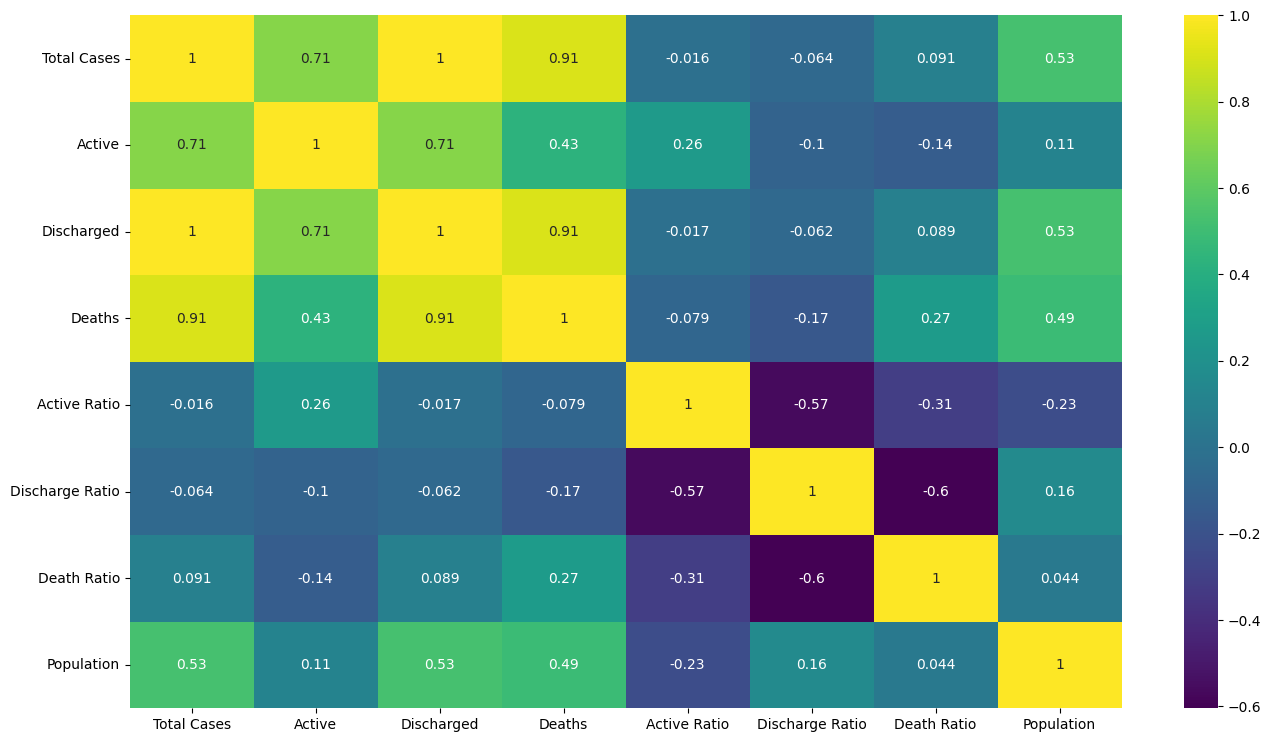

In [63]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

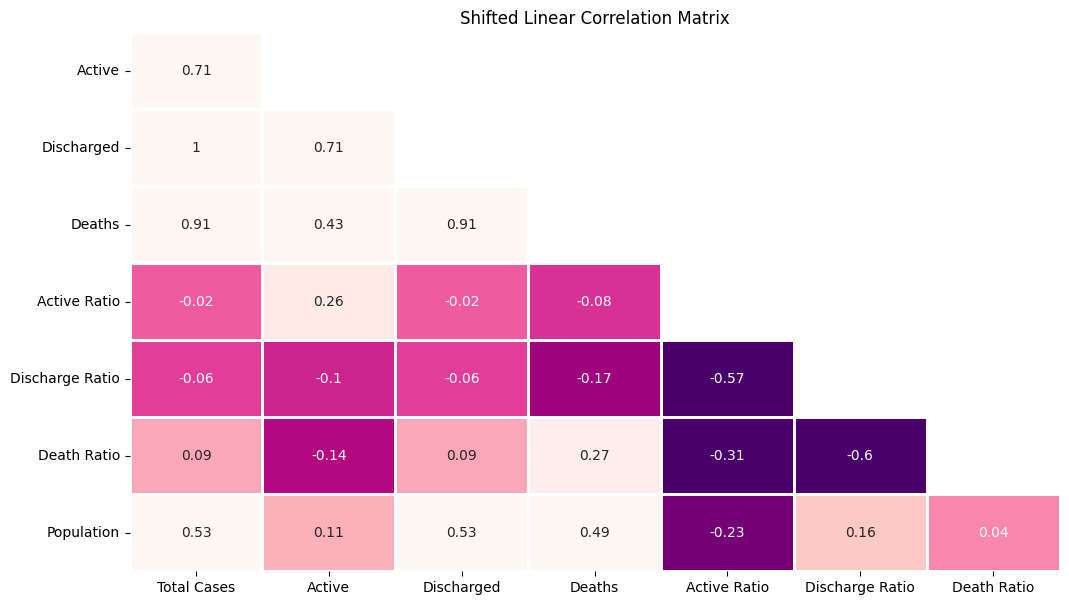

In [64]:
''' Plot a Shifted Correlation Matrix '''
# Diagonal correlation is always unity & less relevant, shifted variant shows only relevant cases
def corrMat(df,id=False):

    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(12,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0,
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_title('Shifted Linear Correlation Matrix')

corrMat(df.drop(['State/UTs'],axis = 1))

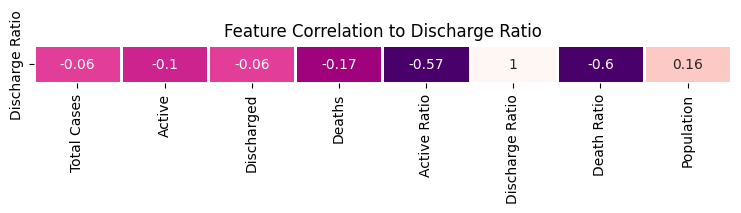

In [65]:
'''Plot Correlation to Target Variable only'''
def corrMat2(df,target='Discharge Ratio',figsize=(9,0.5),ret_id=False):

    corr_mat = df.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, df.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0,
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')

    if(ret_id):
        return corr
corrMat2(df.drop(['State/UTs'],axis = 1))

Discharge ratio is highly negatively corerlated with Active Ratio

In [66]:
df['State/UTs'].value_counts()

Andaman and Nicobar                         1
Andhra Pradesh                              1
Maharashtra                                 1
Manipur                                     1
Meghalaya                                   1
Mizoram                                     1
Nagaland                                    1
Odisha                                      1
Puducherry                                  1
Punjab                                      1
Rajasthan                                   1
Sikkim                                      1
Tamil Nadu                                  1
Telengana                                   1
Tripura                                     1
Uttar Pradesh                               1
Uttarakhand                                 1
Madhya Pradesh                              1
Lakshadweep                                 1
Ladakh                                      1
Delhi                                       1
Arunachal Pradesh                 

In [67]:
fig = px.histogram(df, 'Total Cases',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Total Cases'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

Maharasatra has highest cases 6.5M followed by kerala 4.5M

10 states have total cases morethan 1M

In [68]:
df[df['Total Cases'] < 1000000]['State/UTs']
# States with total cases less than 1M

0                          Andaman and Nicobar
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
7     Dadra and Nagar Haveli and Daman and Diu
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
21                                     Manipur
22                                   Meghalaya
23                                     Mizoram
24                                    Nagaland
26                                  Puducherry
27                                      Punjab
28           

In [69]:
df[df['Total Cases'] < 1000000]['State/UTs'].count()
#count of them

26

In [70]:
x = df[df['Total Cases'] < 1000000]['State/UTs']
y = df[df['Total Cases'] < 1000000]['Total Cases']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [71]:
df[df['Total Cases'] > 1000000]['State/UTs']
# States with total cases morethan 1M

1     Andhra Pradesh
6       Chhattisgarh
8              Delhi
15         Karnataka
16            Kerala
20       Maharashtra
25            Odisha
30        Tamil Nadu
33     Uttar Pradesh
35       West Bengal
Name: State/UTs, dtype: object

In [72]:
df[df['Total Cases'] > 1000000]['State/UTs'].count()
#count of them

10

In [73]:
x = df[df['Total Cases'] > 1000000]['State/UTs']
y = df[df['Total Cases'] > 1000000]['Total Cases']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [74]:
df1 = df[['State/UTs','Total Cases']].sort_values('Total Cases')
df1
# This dataframe is arranged in ascending order of total cases now we can clearly see with state has less total cases

,State/UTs,Total Cases
0,Andaman and Nicobar,7680
18,Lakshadweep,10394
7,Dadra and Nagar Haveli and Daman and Diu,10683
17,Ladakh,21494
24,Nagaland,32100
29,Sikkim,32211
2,Arunachal Pradesh,55269
5,Chandigarh,65443
22,Meghalaya,84414
32,Tripura,84784


In [75]:
x = df1['State/UTs']
y = df1['Total Cases']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [76]:
fig = px.histogram(df, 'Active',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Active'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

Kerala has highest active cases 167.578k followed by maharastra has 45.22k

In [77]:
df[df['Active'] < 10000]['State/UTs']
# States with active cases less than 10k

0                          Andaman and Nicobar
1                               Andhra Pradesh
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
6                                 Chhattisgarh
7     Dadra and Nagar Haveli and Daman and Diu
8                                        Delhi
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
15                                   Karnataka
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
21                                     Manipur
22                                   Meghalaya
23           

In [78]:
df[df['Active'] < 10000]['State/UTs'].count()
# count of them

34

In [79]:
x = df[df['Active'] < 10000]['State/UTs']
y = df[df['Active'] < 10000]['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

andaman, dadra,lakshadweep has no active cases

In [80]:
df[df['Active'] > 10000]['State/UTs']
# States with active cases more than 10k

16         Kerala
20    Maharashtra
Name: State/UTs, dtype: object

In [81]:
df[df['Active'] > 10000]['State/UTs'].count()
# count of them

2

In [82]:
x = df[df['Active'] > 10000]['State/UTs']
y = df[df['Active'] > 10000]['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [83]:
df2 = df[['State/UTs','Active']].sort_values('Active')
df2
# This dataframe is arranged in ascending order of active cases now we can clearly see with state has less total cases

,State/UTs,Active
7,Dadra and Nagar Haveli and Daman and Diu,1
0,Andaman and Nicobar,5
18,Lakshadweep,28
2,Arunachal Pradesh,37
4,Bihar,39
5,Chandigarh,52
33,Uttar Pradesh,86
32,Tripura,89
14,Jharkhand,109
19,Madhya Pradesh,112


In [84]:
x = df2['State/UTs']
y = df2['Active']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [85]:
fig = px.histogram(df, 'Discharged',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Discharged'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [86]:
df[df['Discharged'] < 1000000]['State/UTs']
# States with discharged cases less than 1M

0                          Andaman and Nicobar
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
6                                 Chhattisgarh
7     Dadra and Nagar Haveli and Daman and Diu
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
21                                     Manipur
22                                   Meghalaya
23                                     Mizoram
24                                    Nagaland
26                                  Puducherry
27           

In [87]:
df[df['Discharged'] < 1000000]['State/UTs'].count()
# count of them

27

In [88]:
x = df[df['Discharged'] < 1000000]['State/UTs']
y = df[df['Discharged'] < 1000000]['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

overall india maharastra has highest discharged cases 6.3M followed by kerala 4.3M

In [89]:
df[df['Discharged'] > 1000000]['State/UTs']
# States with discharged cases greather than 1M

1     Andhra Pradesh
8              Delhi
15         Karnataka
16            Kerala
20       Maharashtra
25            Odisha
30        Tamil Nadu
33     Uttar Pradesh
35       West Bengal
Name: State/UTs, dtype: object

In [90]:
df[df['Discharged'] > 1000000]['State/UTs'].count()

9

In [91]:
x = df[df['Discharged'] > 1000000]['State/UTs']
y = df[df['Discharged'] > 1000000]['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [92]:
df3 = df[['State/UTs','Discharged']].sort_values('Discharged')
df3
# This dataframe is arranged in ascending order of discharged cases now we can clearly see with state has less total cases

,State/UTs,Discharged
0,Andaman and Nicobar,7546
18,Lakshadweep,10315
7,Dadra and Nagar Haveli and Daman and Diu,10678
17,Ladakh,21032
24,Nagaland,31269
29,Sikkim,31694
2,Arunachal Pradesh,54952
5,Chandigarh,64571
22,Meghalaya,82635
32,Tripura,83874


In [93]:
x = df3['State/UTs']
y = df3['Discharged']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [94]:
fig = px.histogram(df, 'Deaths',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Deaths'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [95]:
df[df['Deaths'] < 20000]['State/UTs']
# States with deaths less than 20k

0                          Andaman and Nicobar
1                               Andhra Pradesh
2                            Arunachal Pradesh
3                                        Assam
4                                        Bihar
5                                   Chandigarh
6                                 Chhattisgarh
7     Dadra and Nagar Haveli and Daman and Diu
9                                          Goa
10                                     Gujarat
11                                     Haryana
12                            Himachal Pradesh
13                           Jammu and Kashmir
14                                   Jharkhand
17                                      Ladakh
18                                 Lakshadweep
19                              Madhya Pradesh
21                                     Manipur
22                                   Meghalaya
23                                     Mizoram
24                                    Nagaland
25           

In [96]:
df[df['Deaths'] < 20000]['State/UTs'].count()
#count of them

30

In [97]:
x = df[df['Deaths'] < 20000]['State/UTs']
y =df[df['Deaths'] < 20000]['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

laksha dweep and darda has no deaths

In [98]:
df[df['Deaths'] > 20000]['State/UTs']
# States with deaths morethan 20k

8             Delhi
15        Karnataka
16           Kerala
20      Maharashtra
30       Tamil Nadu
33    Uttar Pradesh
Name: State/UTs, dtype: object

In [99]:
df[df['Deaths'] > 20000]['State/UTs'].count()
#count of them

6

In [100]:
x = df[df['Deaths'] > 20000]['State/UTs']
y =df[df['Deaths'] > 20000]['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

maharastra has more number of deaths 138.546k followed by karnataka 37.627k

In [101]:
df4 = df[['State/UTs','Deaths']].sort_values('Deaths')
df4
# This dataframe is arranged in ascending order of deaths now we can clearly see with state has less total cases

,State/UTs,Deaths
7,Dadra and Nagar Haveli and Daman and Diu,4
18,Lakshadweep,51
0,Andaman and Nicobar,129
17,Ladakh,213
2,Arunachal Pradesh,280
29,Sikkim,403
23,Mizoram,490
24,Nagaland,696
5,Chandigarh,820
32,Tripura,821


In [102]:
x = df4['State/UTs']
y = df4['Deaths']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [103]:
fig = px.histogram(df, 'Active Ratio',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Active Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [104]:
df5 = df[['State/UTs','Active Ratio']].sort_values('Active Ratio')
df5

,State/UTs,Active Ratio
19,Madhya Pradesh,0.01
33,Uttar Pradesh,0.01
4,Bihar,0.01
7,Dadra and Nagar Haveli and Daman and Diu,0.01
28,Rajasthan,0.02
11,Haryana,0.02
8,Delhi,0.02
14,Jharkhand,0.03
6,Chhattisgarh,0.03
10,Gujarat,0.04


In [105]:
x = df5['State/UTs']
y = df5['Active Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [106]:
fig = px.histogram(df, 'Discharge Ratio',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Discharge Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

except mizoram all states had discahrge rate morethan 95%

In [107]:
df6 = df[['State/UTs','Discharge Ratio']].sort_values('Discharge Ratio')
df6

,State/UTs,Discharge Ratio
23,Mizoram,96.57
27,Punjab,97.20
24,Nagaland,97.41
20,Maharashtra,97.70
34,Uttarakhand,97.80
17,Ladakh,97.85
22,Meghalaya,97.89
21,Manipur,97.89
12,Himachal Pradesh,97.95
9,Goa,97.96


In [108]:
x = df6['State/UTs']
y = df6['Discharge Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [109]:
fig = px.histogram(df, 'Death Ratio',
                   color="State/UTs",
                   title="<b>Average cases per state</b>")

fig.add_vline(x=df['Death Ratio'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [110]:
df7 = df[['State/UTs','Death Ratio']].sort_values('Death Ratio')
df7

,State/UTs,Death Ratio
7,Dadra and Nagar Haveli and Daman and Diu,0.04
23,Mizoram,0.36
18,Lakshadweep,0.49
2,Arunachal Pradesh,0.51
31,Telengana,0.59
1,Andhra Pradesh,0.70
16,Kerala,0.77
25,Odisha,0.80
28,Rajasthan,0.94
32,Tripura,0.97


In [111]:
x = df7['State/UTs']
y = df7['Death Ratio']
data = go.Bar(x= x,y= y)
layout = go.Layout(title = 'Simple Bar Chart')
fig = go.Figure(data=data,layout=layout)
fig.show()

In [112]:
a = []
for i in df1['State/UTs'].tail(5):
    a.append(i)
df1.tail()

,State/UTs,Total Cases
1,Andhra Pradesh,2072446
30,Tamil Nadu,2724731
15,Karnataka,2995285
16,Kerala,5129359
20,Maharashtra,6633612


In [113]:
for i in df2['State/UTs'].tail(5):
    a.append(i)
df2.tail()

,State/UTs,Active
15,Karnataka,6783
35,West Bengal,7820
30,Tamil Nadu,8382
20,Maharashtra,11905
16,Kerala,49152


In [114]:
for i in df3['State/UTs'].tail(5):
    a.append(i)
df3.tail()

,State/UTs,Discharged
1,Andhra Pradesh,2055856
30,Tamil Nadu,2679895
15,Karnataka,2950306
16,Kerala,5040528
20,Maharashtra,6480799


In [115]:
for i in df4['State/UTs'].tail(5):
    a.append(i)
df4.tail()

,State/UTs,Deaths
8,Delhi,25096
30,Tamil Nadu,36454
15,Karnataka,38196
16,Kerala,39679
20,Maharashtra,140908


In [116]:
for i in df5['State/UTs'].tail(5):
    a.append(i)
df5.tail()

,State/UTs,Active Ratio
31,Telengana,0.52
21,Manipur,0.54
16,Kerala,0.96
17,Ladakh,1.16
23,Mizoram,3.07


In [117]:
for i in df6['State/UTs'].tail(5):
    a.append(i)
df6.tail()

,State/UTs,Discharge Ratio
28,Rajasthan,99.04
1,Andhra Pradesh,99.20
18,Lakshadweep,99.24
2,Arunachal Pradesh,99.43
7,Dadra and Nagar Haveli and Daman and Diu,99.95


In [118]:
for i in df7['State/UTs'].tail(5):
    a.append(i)
df7.tail()

,State/UTs,Death Ratio
9,Goa,1.89
20,Maharashtra,2.12
34,Uttarakhand,2.15
24,Nagaland,2.17
27,Punjab,2.75


In [119]:
a
len(a)

35

In [120]:
c = []
for i in a:
    if i not in c:
        c.append(i)
c
# removing repeated states

['Andhra Pradesh',
 'Tamil Nadu',
 'Karnataka',
 'Kerala',
 'Maharashtra',
 'West Bengal',
 'Delhi',
 'Telengana',
 'Manipur',
 'Ladakh',
 'Mizoram',
 'Rajasthan',
 'Lakshadweep',
 'Arunachal Pradesh',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Goa',
 'Uttarakhand',
 'Nagaland',
 'Punjab']

In [121]:
v = df['State/UTs'].index.values
v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [122]:
m = []
for i in range(len(v)):
    if df['State/UTs'][i] in c:
        m.append(v[i])
m

[1, 2, 7, 8, 9, 15, 16, 17, 18, 20, 21, 23, 24, 27, 28, 30, 31, 34, 35]

In [123]:
df8 = df.loc[m]
df8

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
1,Andhra Pradesh,2072446,2158,2055856,14432,0.10,99.20,0.70,91702478
2,Arunachal Pradesh,55269,37,54952,280,0.07,99.43,0.51,1711947
7,Dadra and Nagar Haveli and Daman and Diu,10683,1,10678,4,0.01,99.95,0.04,773997
8,Delhi,1440834,290,1415448,25096,0.02,98.24,1.74,19301096
9,Goa,178839,275,175183,3381,0.15,97.96,1.89,1521992
15,Karnataka,2995285,6783,2950306,38196,0.23,98.50,1.28,69599762
16,Kerala,5129359,49152,5040528,39679,0.96,98.27,0.77,34698876
17,Ladakh,21494,249,21032,213,1.16,97.85,0.99,290492
18,Lakshadweep,10394,28,10315,51,0.27,99.24,0.49,66001
20,Maharashtra,6633612,11905,6480799,140908,0.18,97.70,2.12,124904071


consists of states which are top 5 or bottom of respective column

In [124]:
x = df8['State/UTs']
y1 = df8['Total Cases']
y2 = df8['Active']
y3 = df8['Discharged']
y4 = df8['Deaths']
trace1 = go.Bar(x= x,y= y1,marker={'color' : '#FFB300'},name = 'Total Cases')
trace2 = go.Bar(x= x,y= y2,marker={'color' : '#F7DC6F'},name = 'Active')
trace3 = go.Bar(x= x,y= y3,marker={'color' : '#FF9800'},name = 'Discharged')
trace4 = go.Bar(x= x,y= y4,marker={'color' : '#7CB342'},name = 'Deaths')
layout = go.Layout(title= 'Grouped Bar Graph' , width=980,height=800)
data = [trace1,trace2,trace3,trace4]
fig = go.Figure(data=data, layout=layout)
fig.show()

# over all visualisation of states

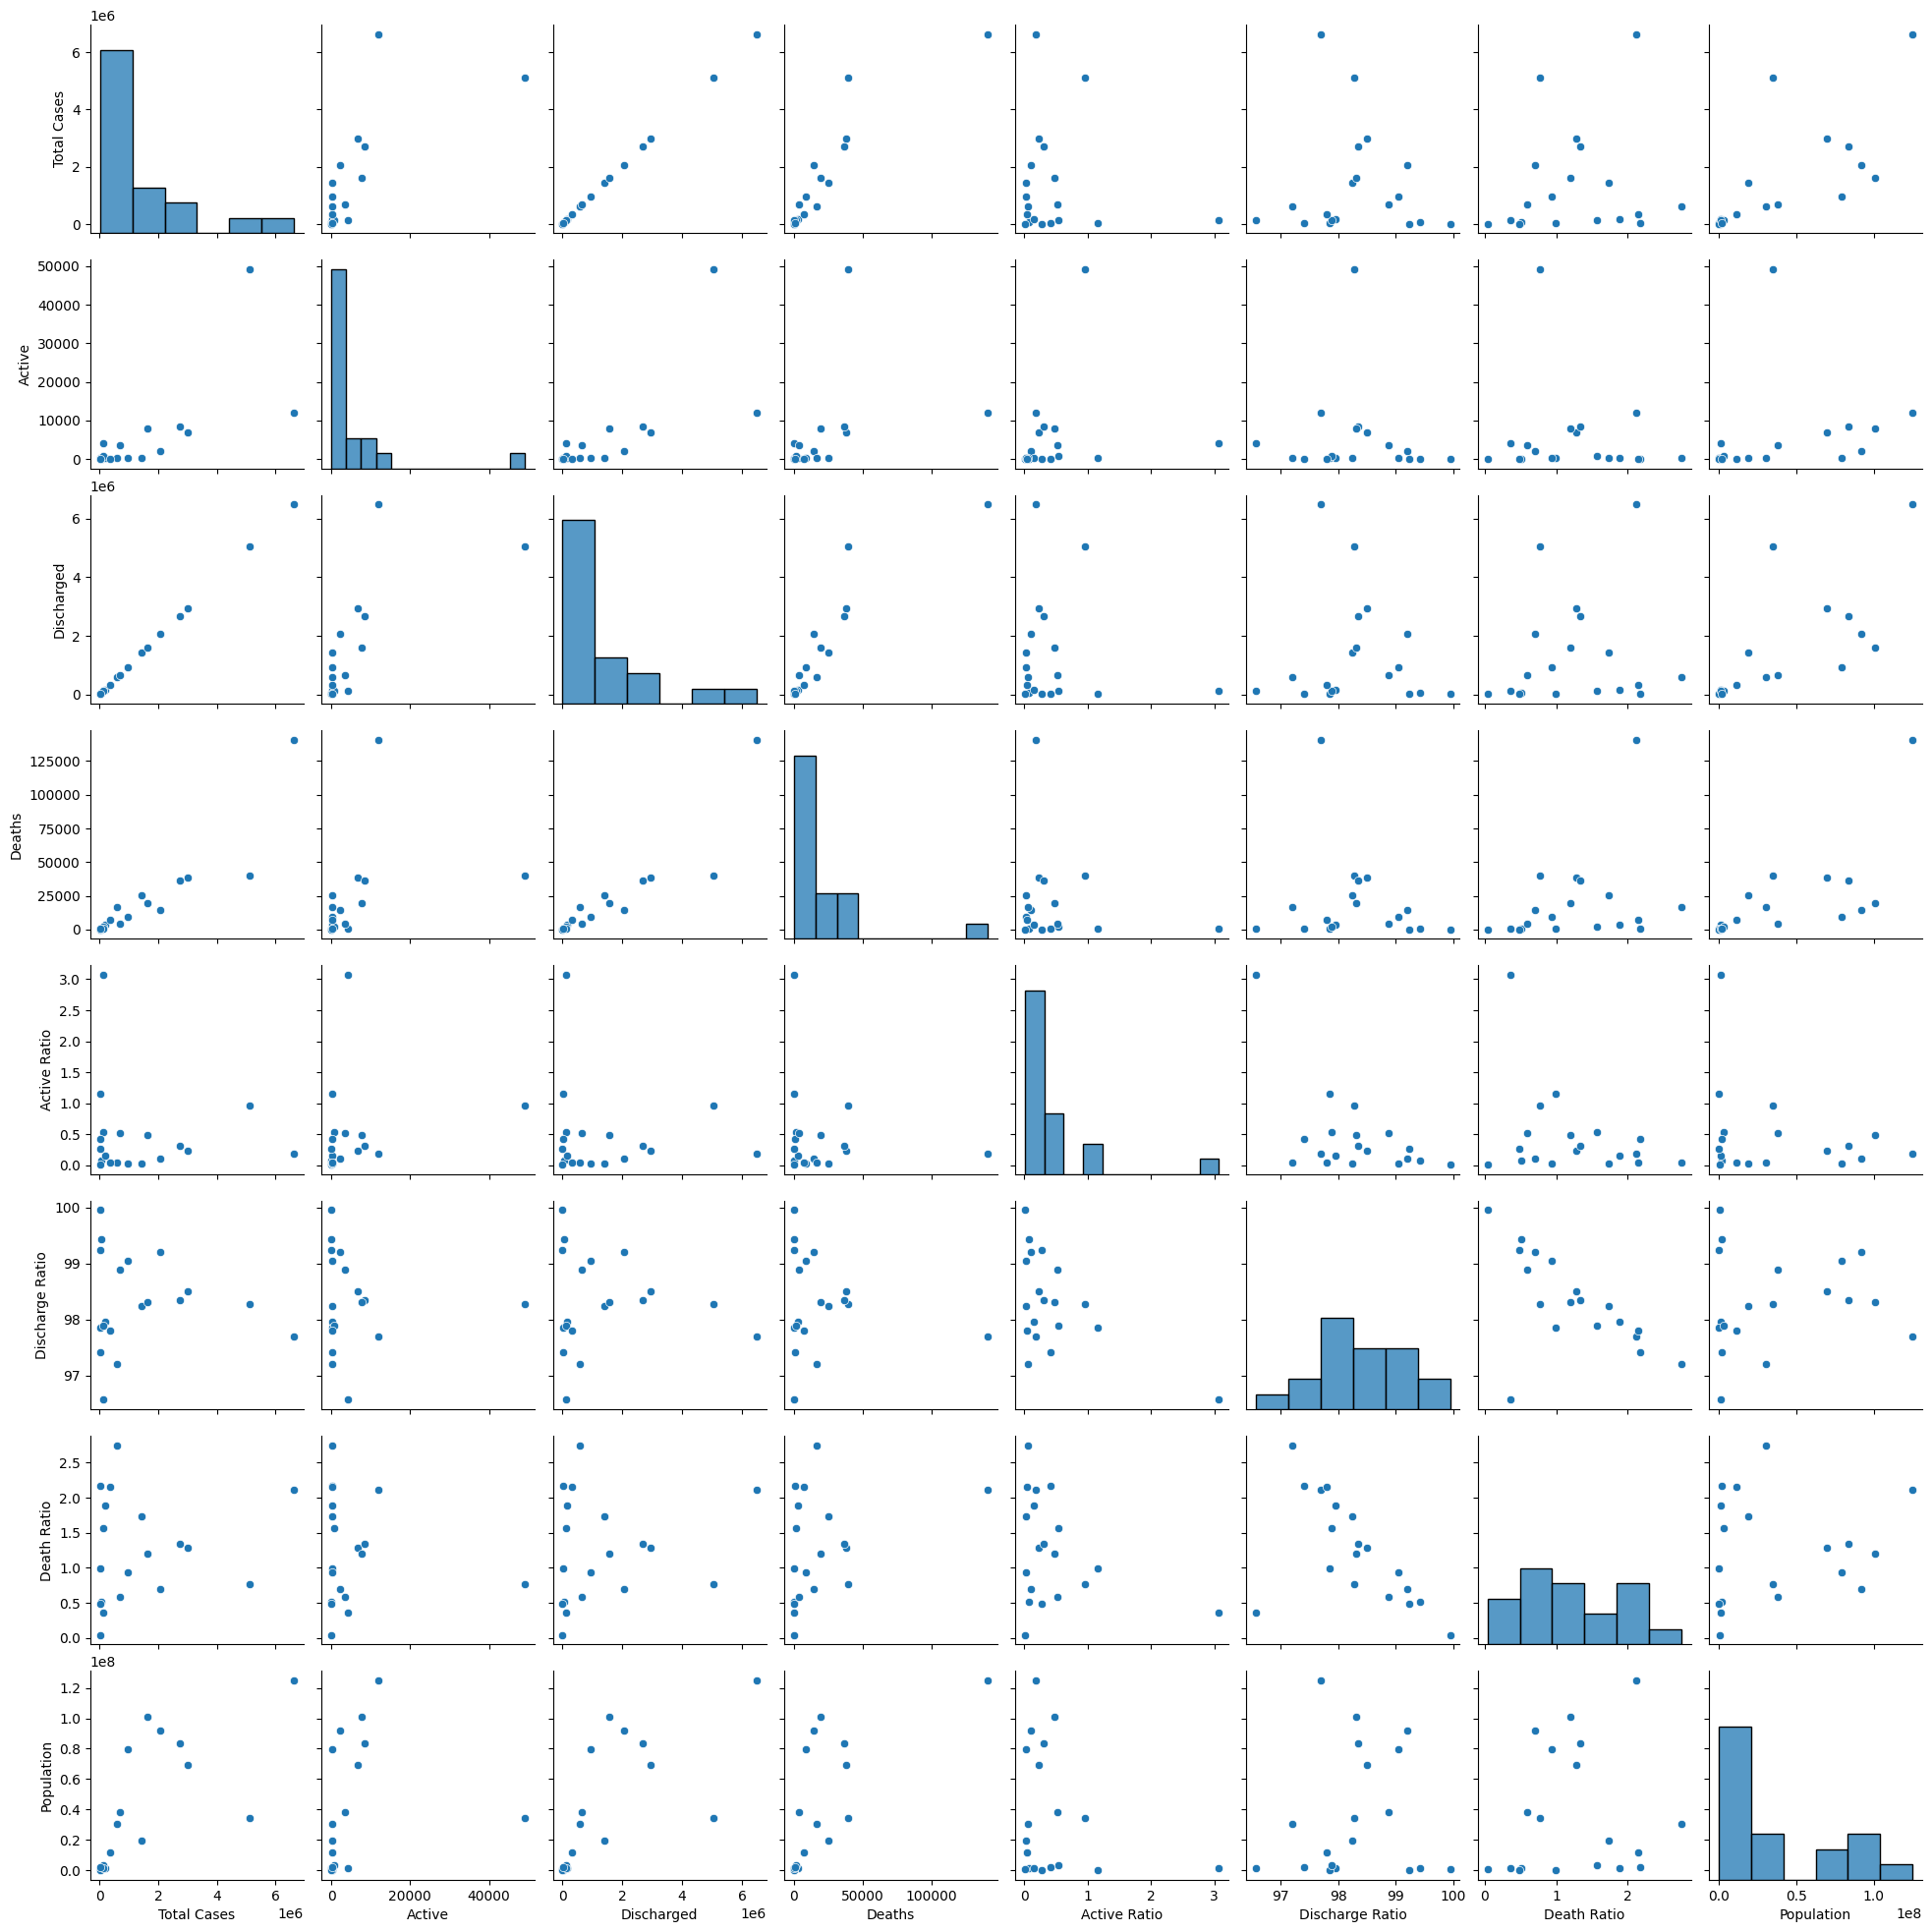

In [125]:
# pairplot of dataframe contating only top 5 or bottom 5 in a column
sns.pairplot(df8)

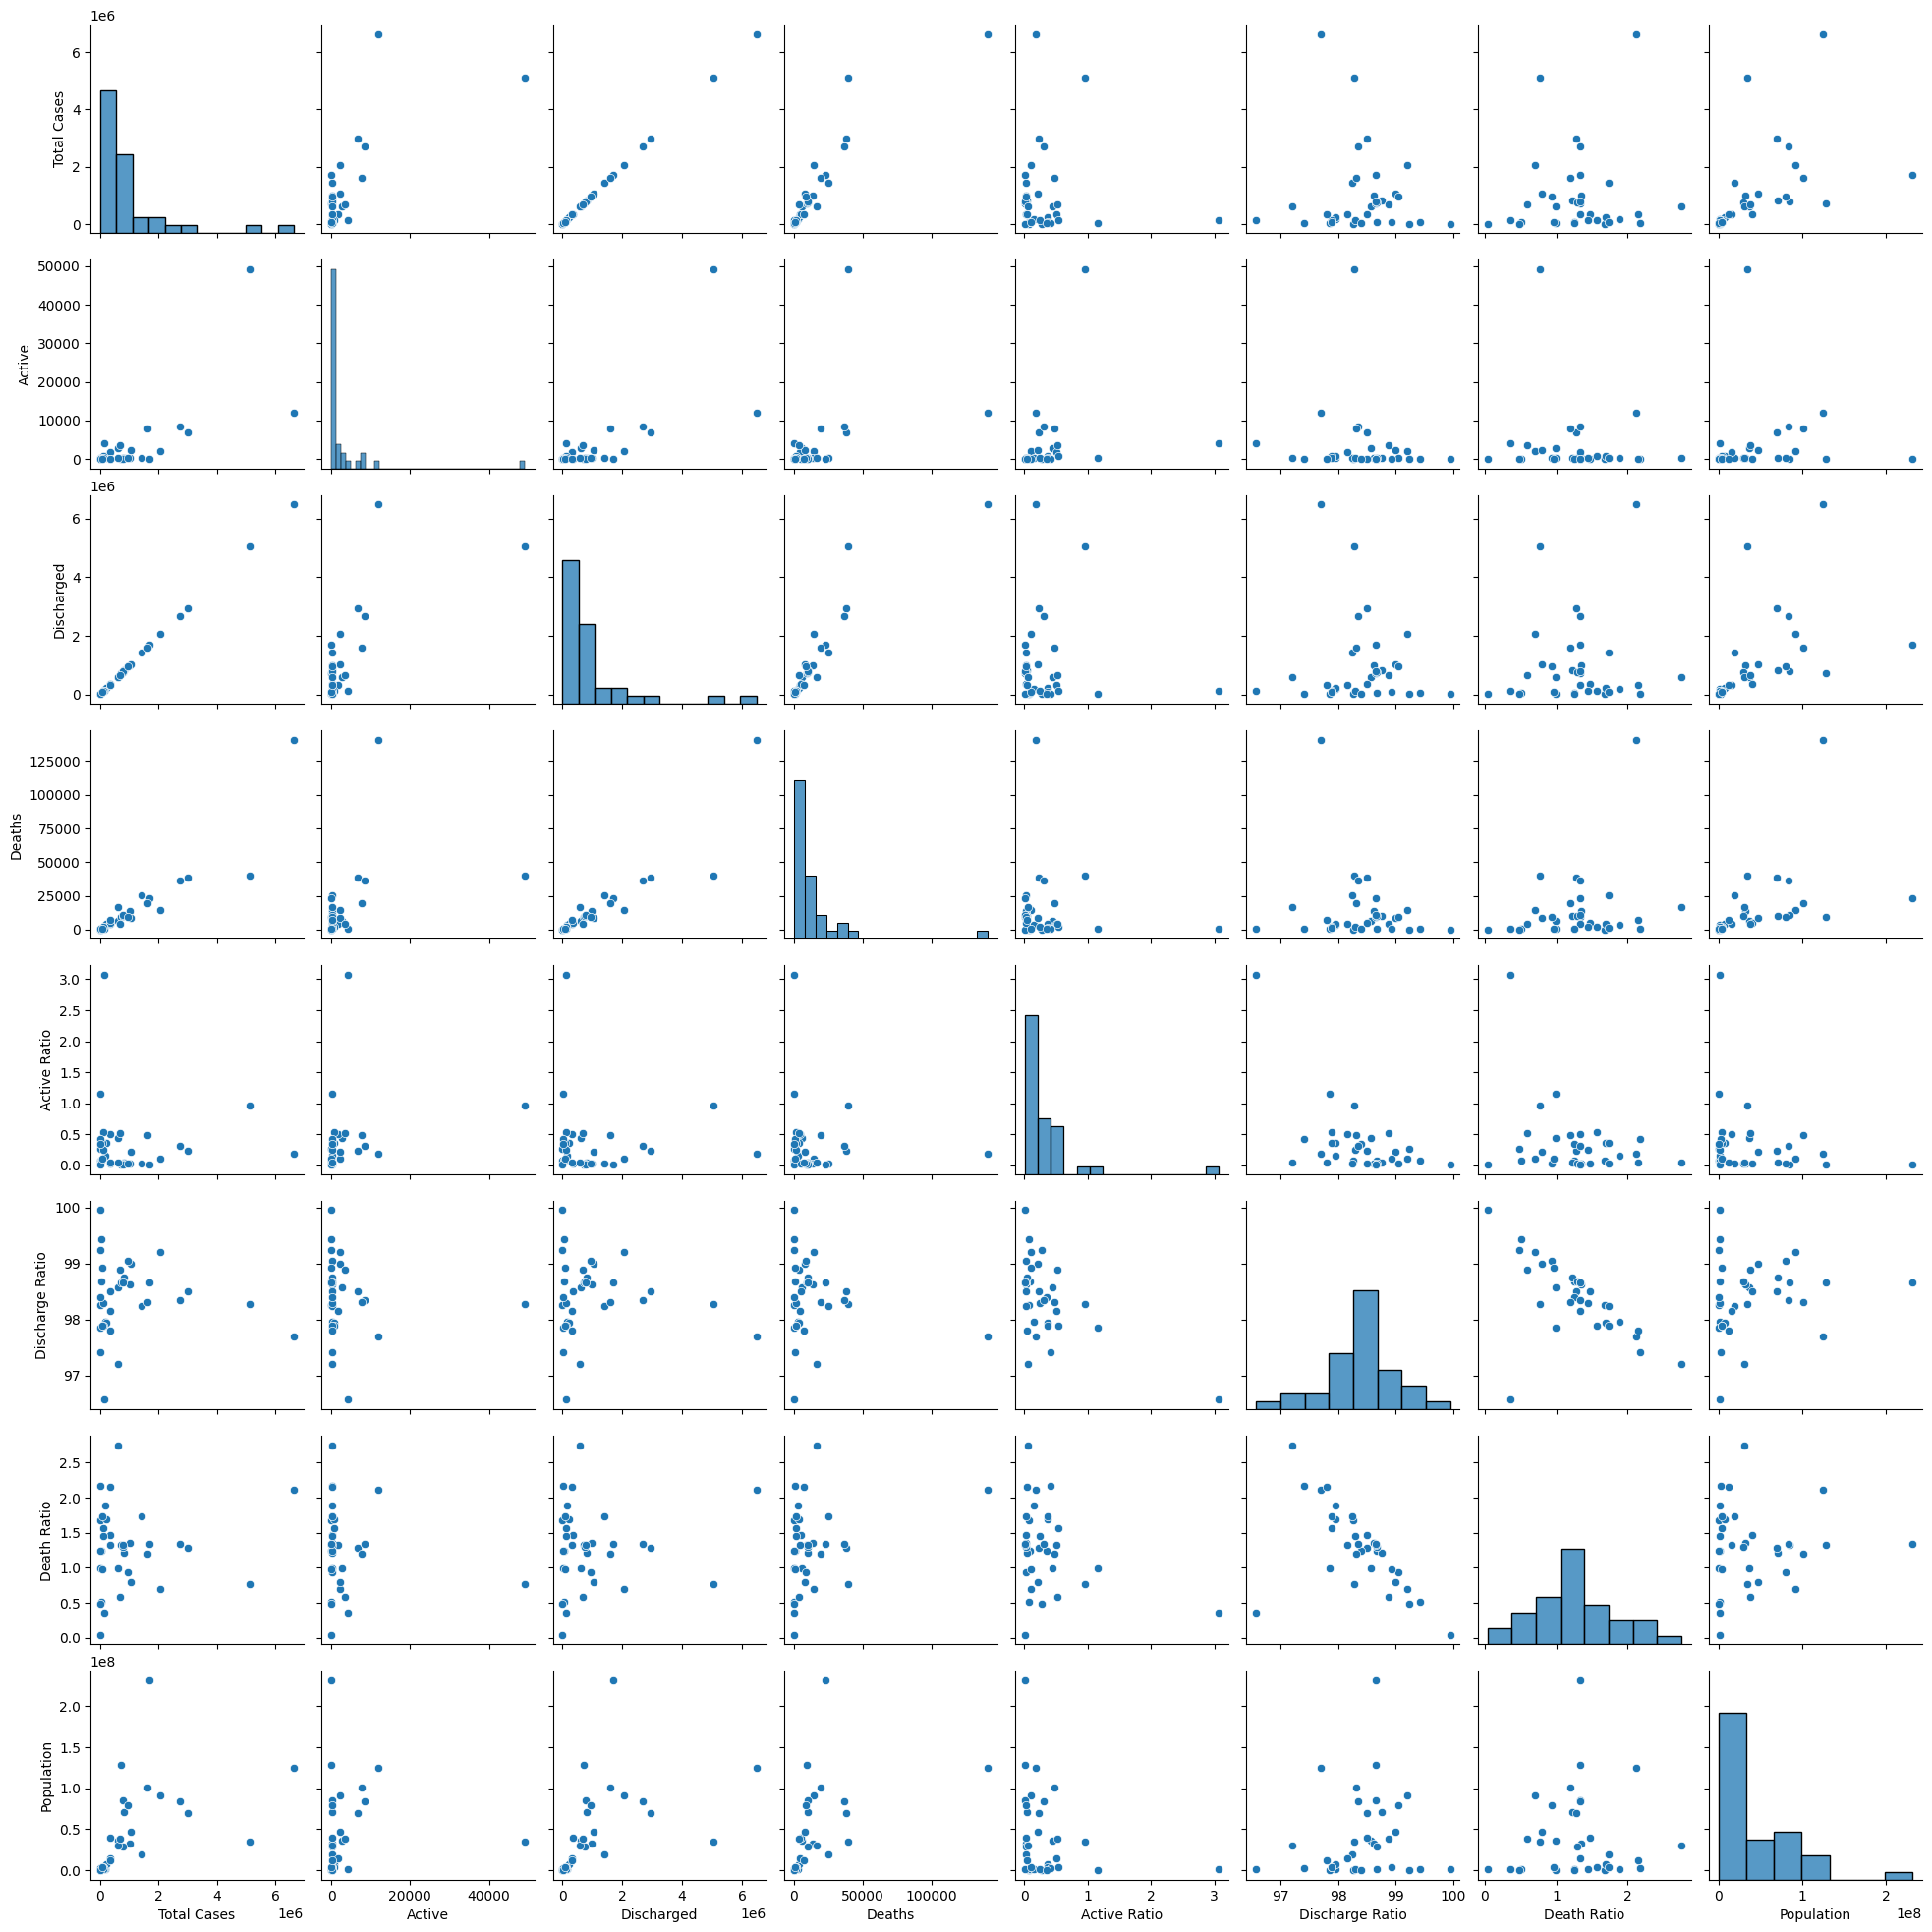

In [126]:
# pairplot of original dataframe
sns.pairplot(df)

<ipython-input-127-801580717ea4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



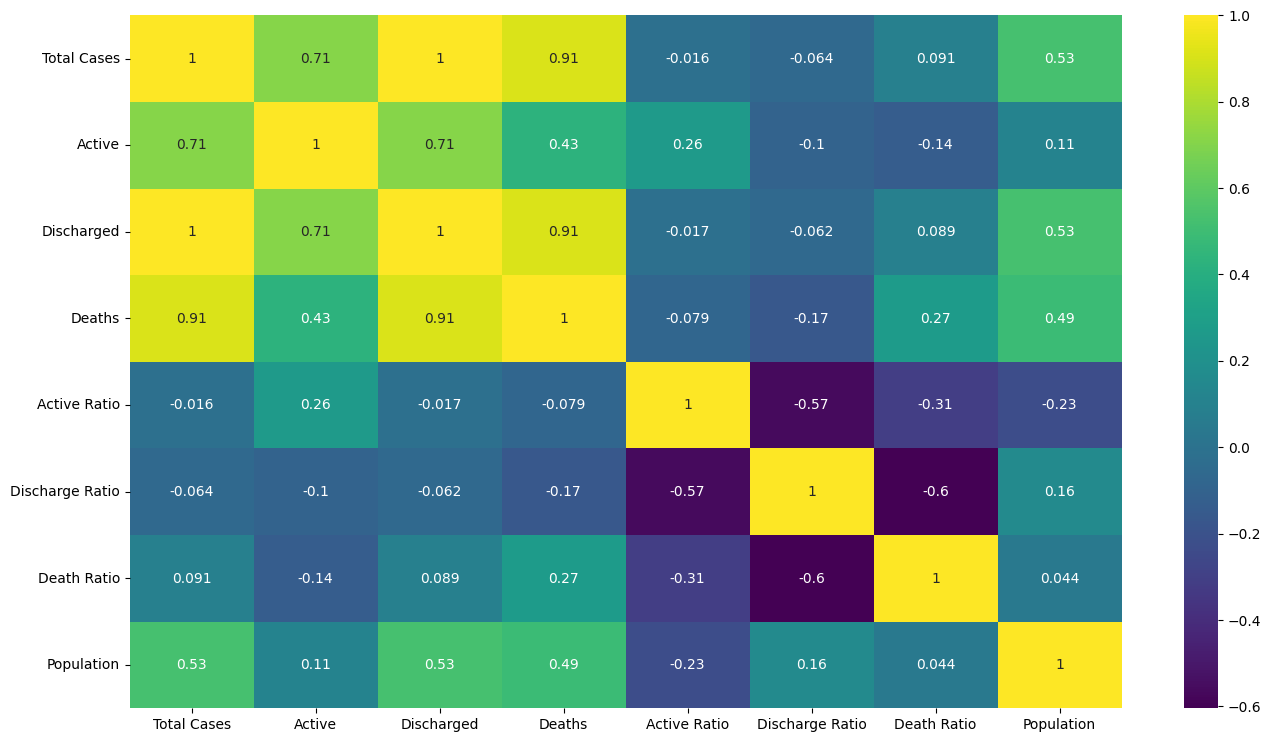

In [127]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df.corr(),annot = True, cmap = 'viridis')
plt.show()

<ipython-input-128-2007db1d8f1d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



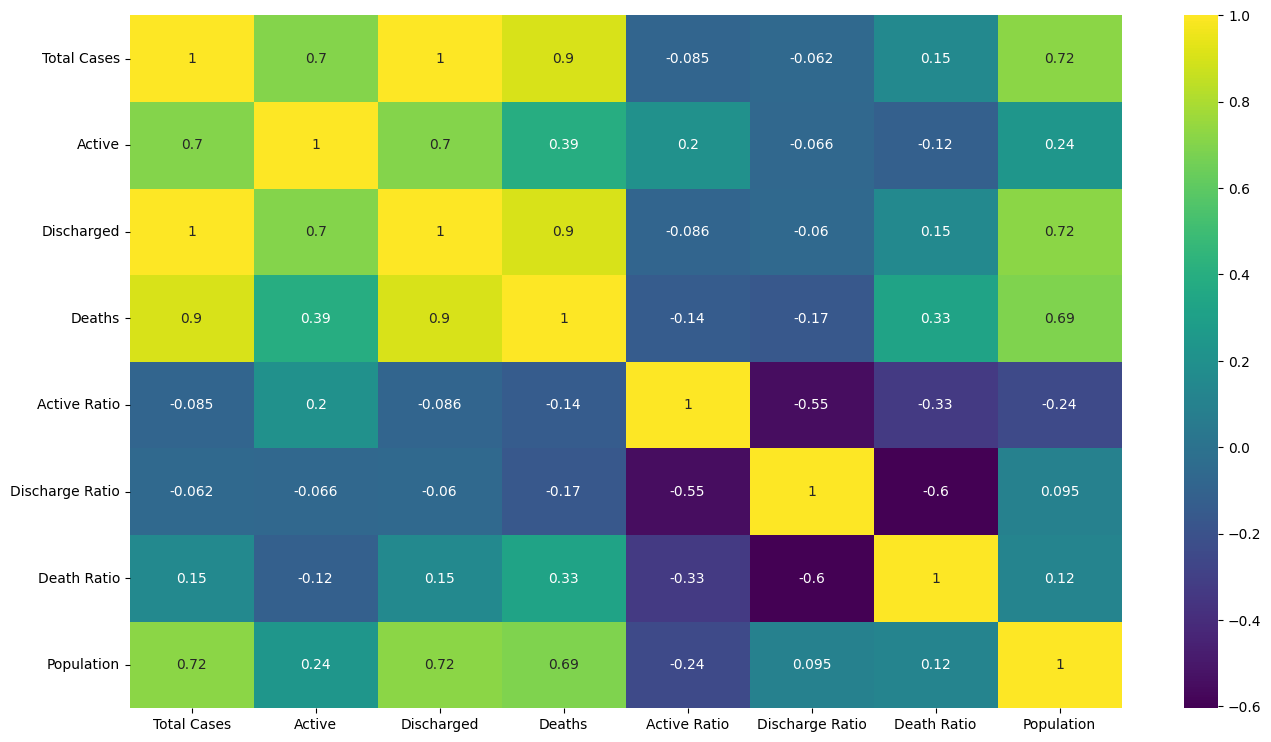

In [128]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(df8.corr(),annot = True, cmap = 'viridis')
plt.show()

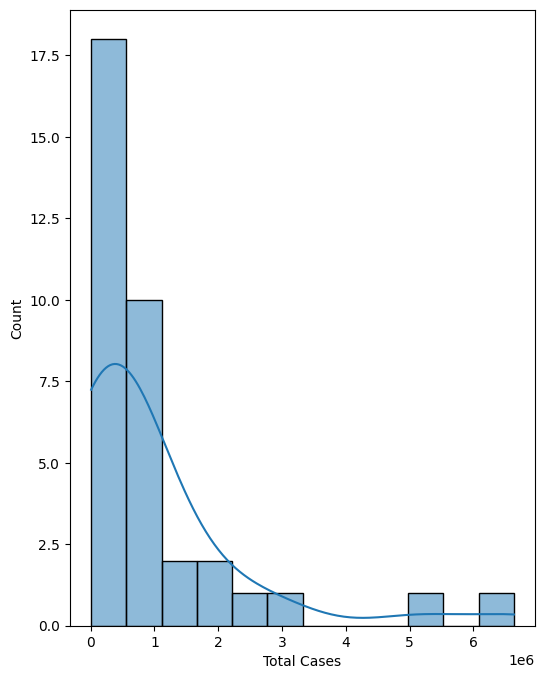

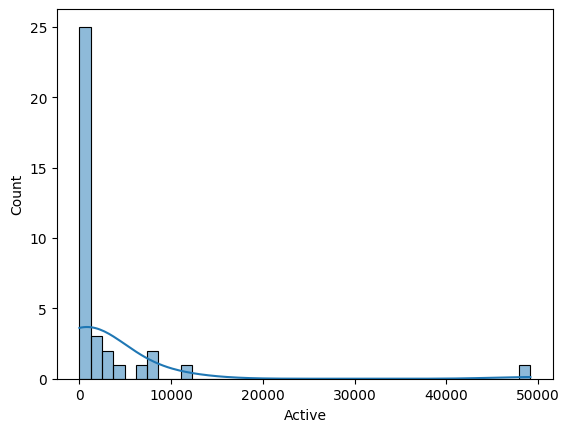

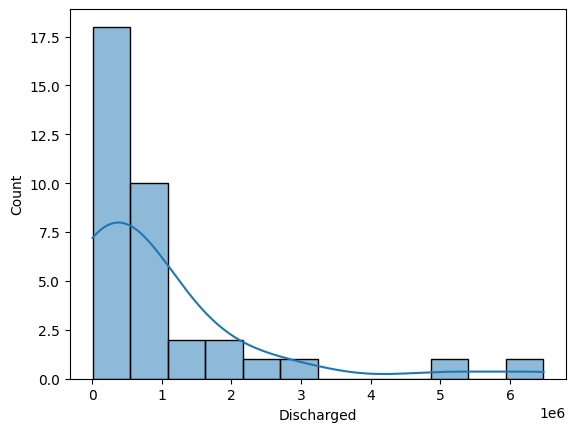

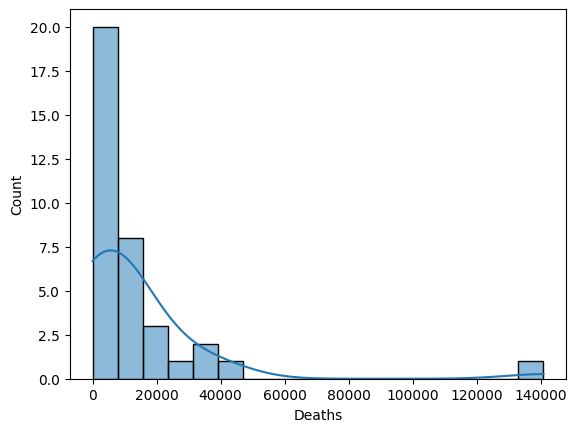

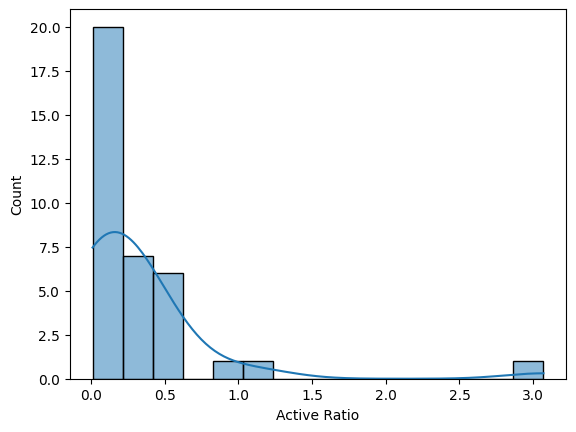

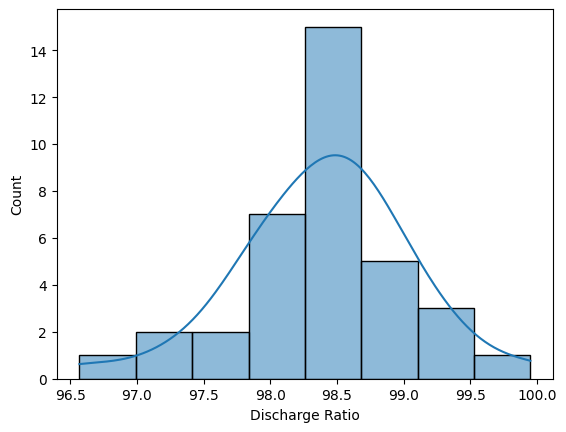

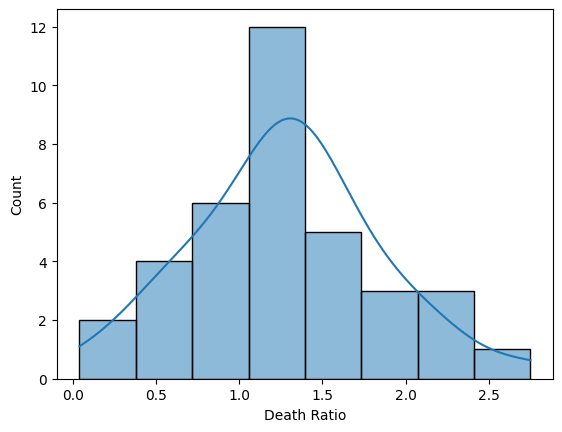

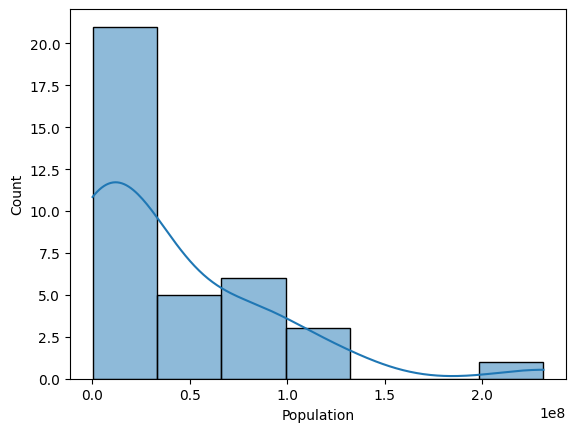

In [129]:
plt.figure(figsize=(6,8))
x = df.drop(['State/UTs'],axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

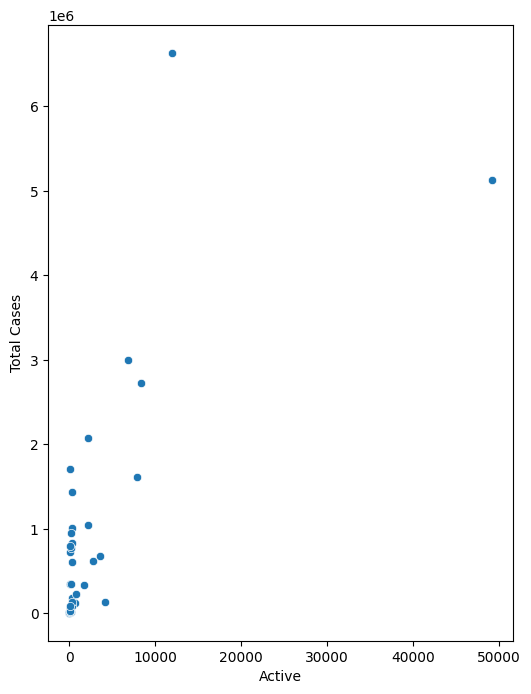

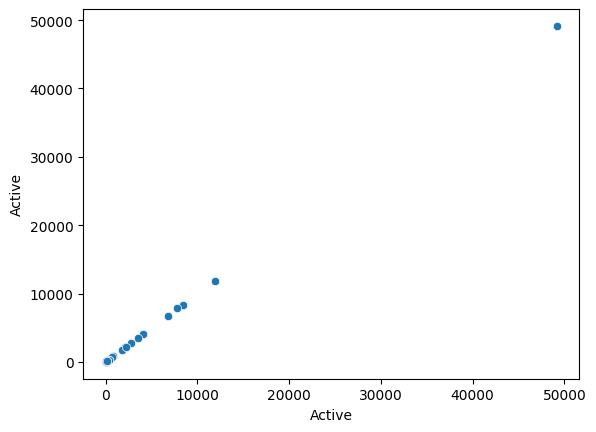

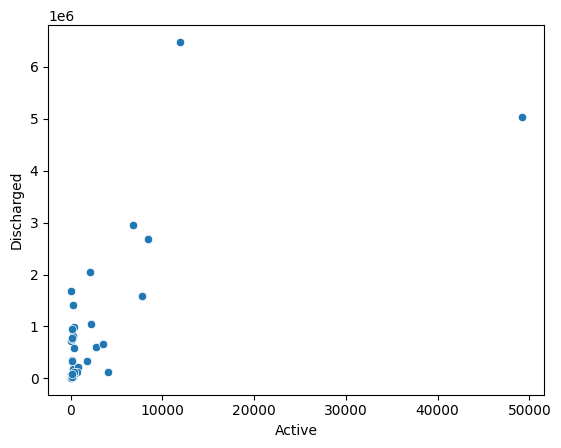

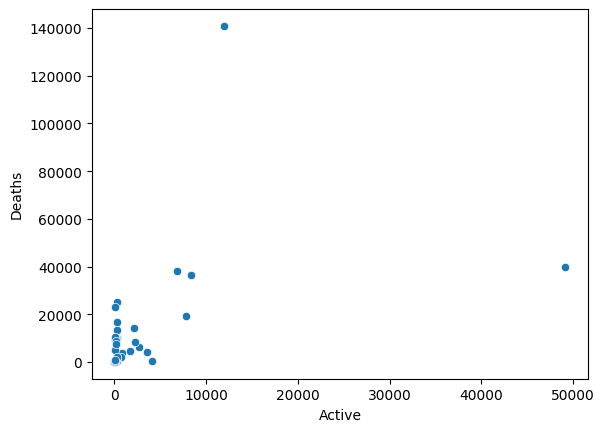

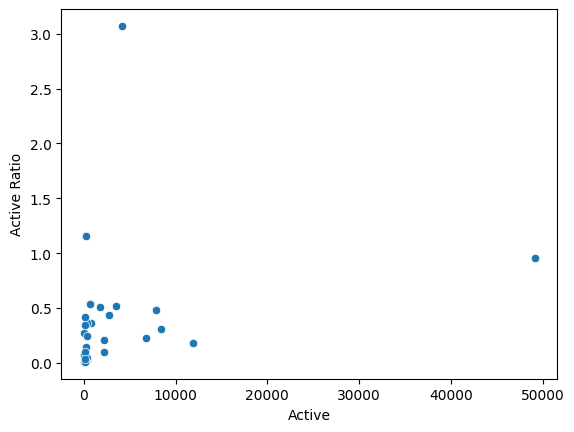

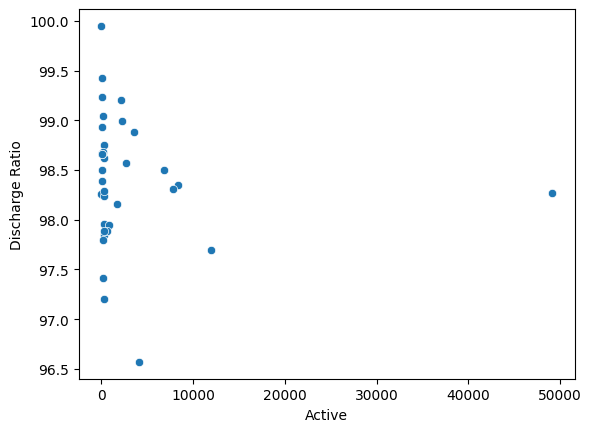

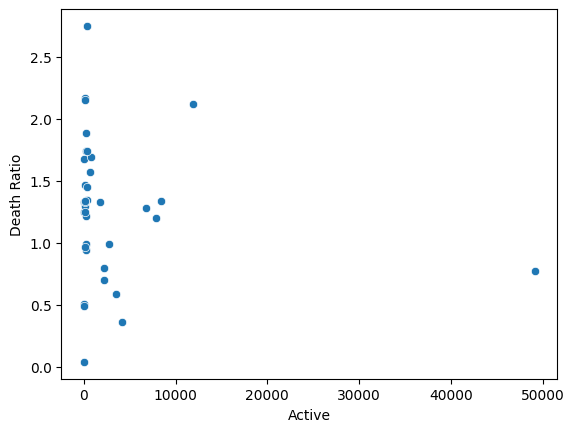

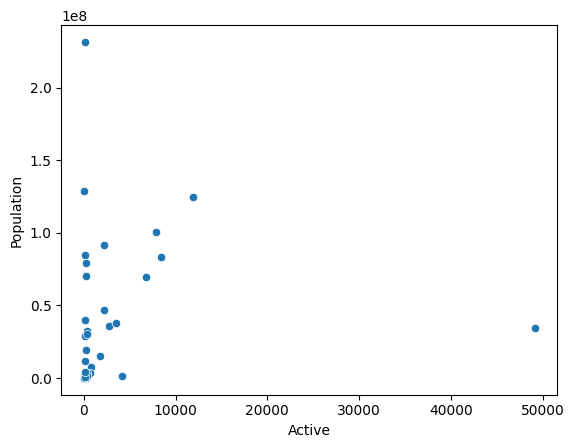

In [130]:
plt.figure(figsize=(6,8))
x = df.drop(['State/UTs'],axis = 1)
for i in x.columns:
    sns.scatterplot(x= 'Active',y=x[i],data=df)
    plt.show()

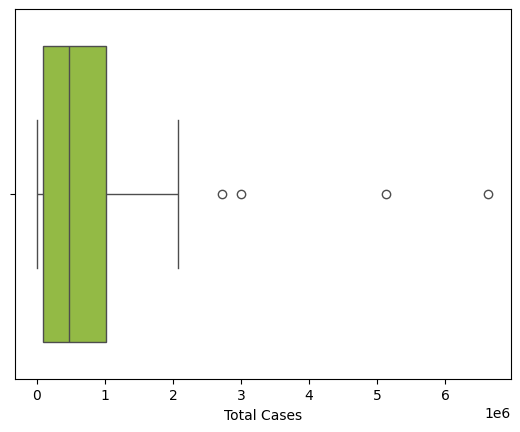

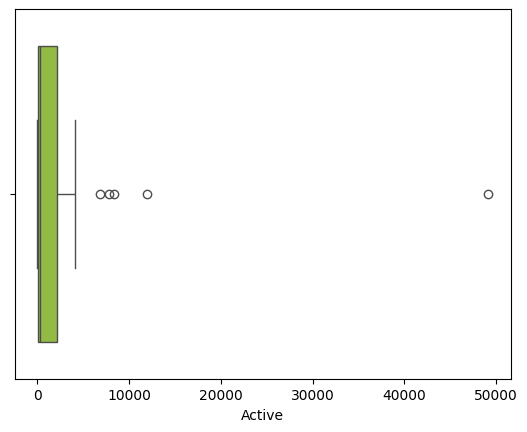

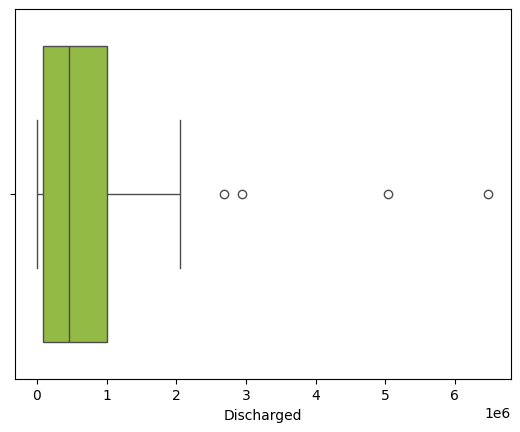

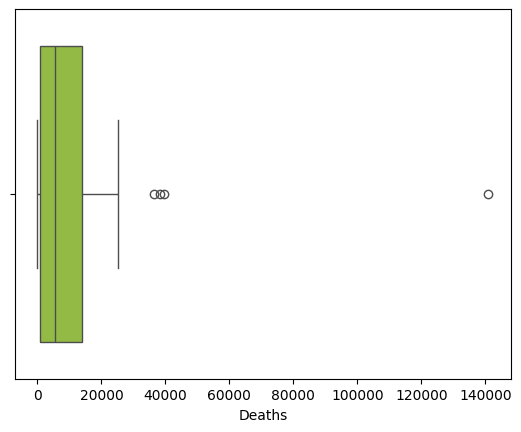

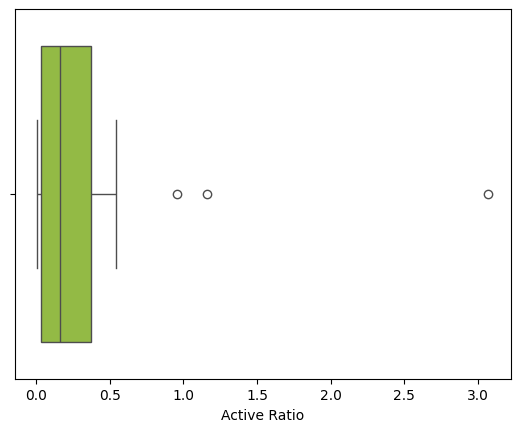

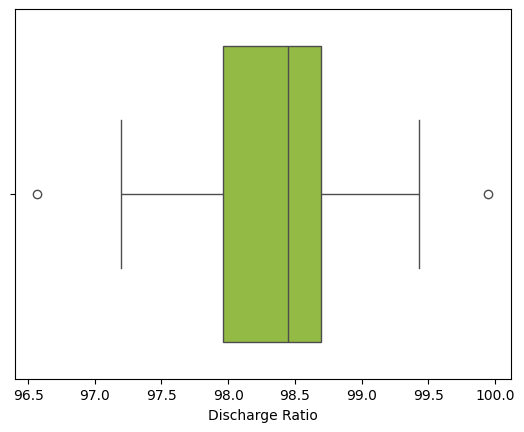

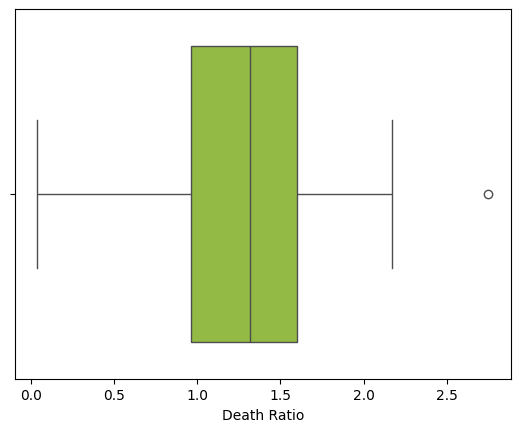

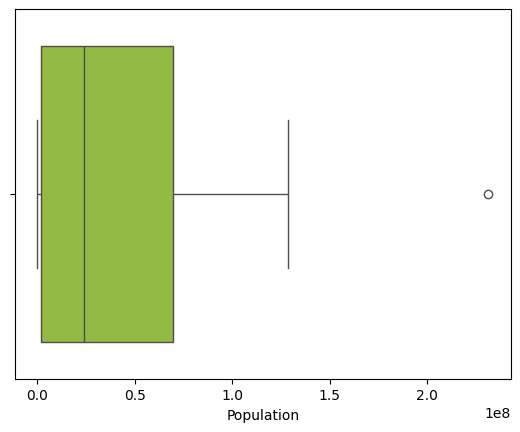

In [131]:
x = df.drop('State/UTs',axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'yellowgreen')
    plt.xlabel(i)
    plt.show()

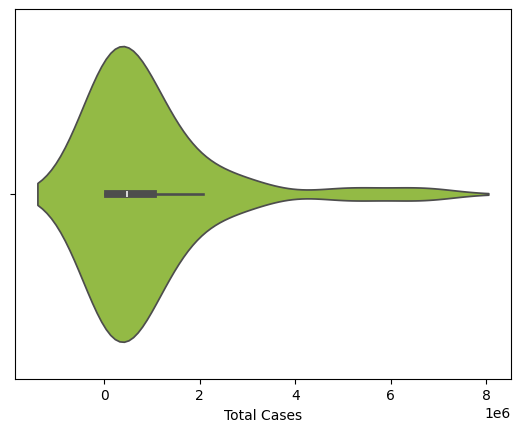

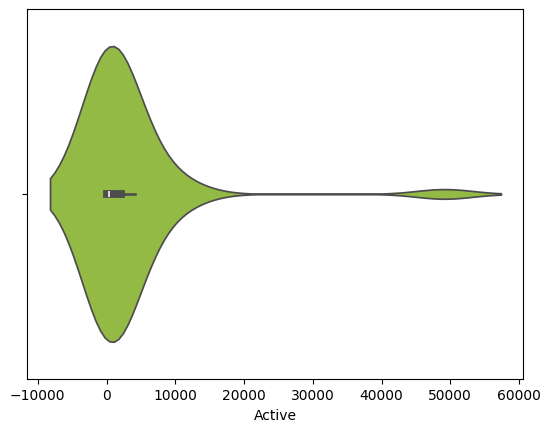

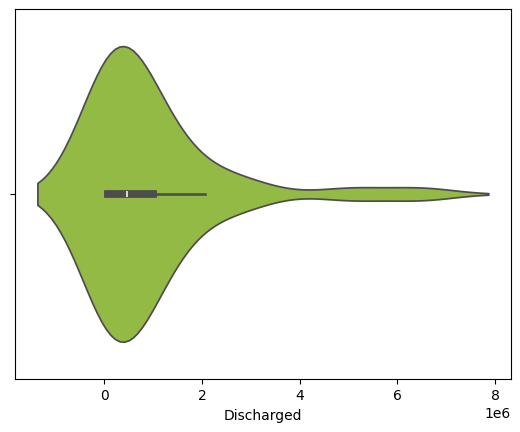

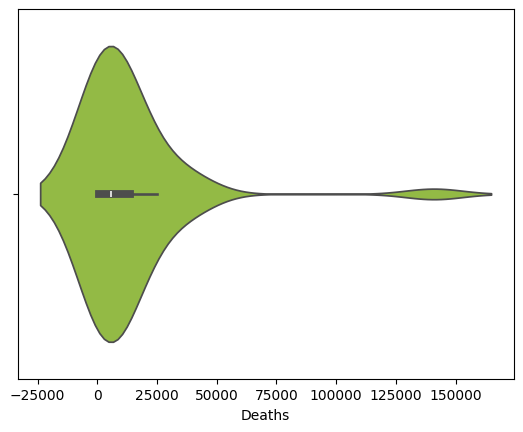

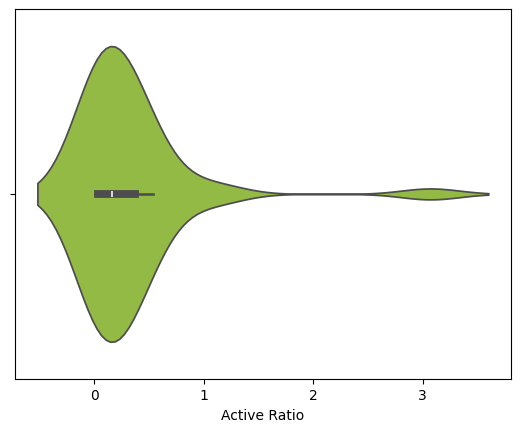

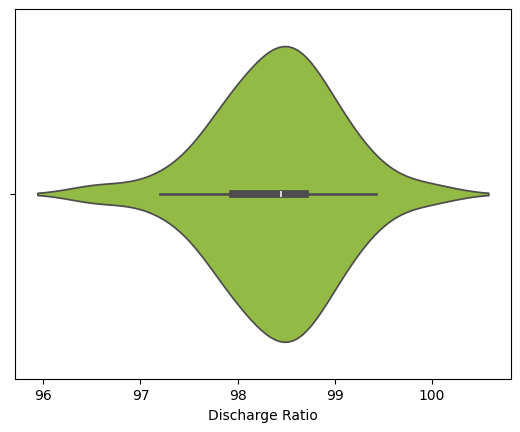

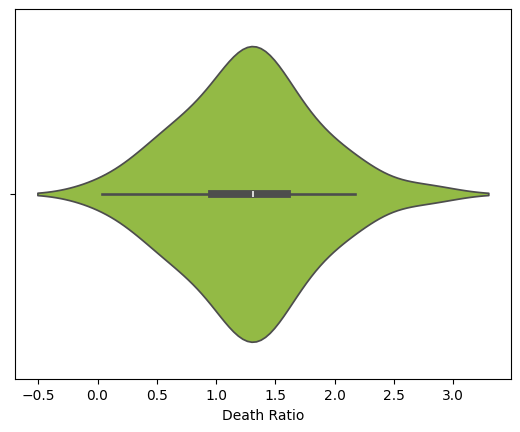

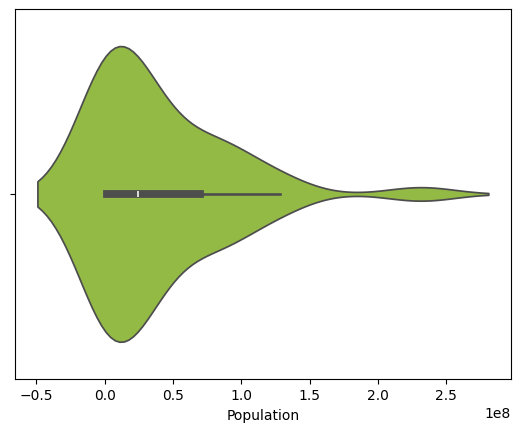

In [132]:
x = df.drop('State/UTs',axis = 1)
for i in x.columns:
    sns.violinplot(x = i, data = x,color = 'yellowgreen')
    plt.xlabel(i)
    plt.show()

Count of outliers

In [133]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x.columns:
    count_outliers(df,i)

There are outliers in Total Cases
Count of outliers are: 4
There are outliers in Active
Count of outliers are: 5
There are outliers in Discharged
Count of outliers are: 4
There are outliers in Deaths
Count of outliers are: 4
There are outliers in Active Ratio
Count of outliers are: 3
There are outliers in Discharge Ratio
Count of outliers are: 2
There are outliers in Death Ratio
Count of outliers are: 2
There are outliers in Population
Count of outliers are: 1


Data Preprocessing

In [134]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
c1 = 'State/UTs'
df[c1]= label_encoder.fit_transform(df[c1])
df[c1].unique()
df

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,0,7680,5,7546,129,0.07,98.26,1.68,399001
1,1,2072446,2158,2055856,14432,0.10,99.20,0.70,91702478
2,2,55269,37,54952,280,0.07,99.43,0.51,1711947
3,3,616435,2720,607624,6091,0.44,98.57,0.99,35998752
4,4,726212,39,716510,9663,0.01,98.66,1.33,128500364
5,5,65443,52,64571,820,0.08,98.67,1.25,1158040
6,6,1006733,326,992814,13593,0.03,98.62,1.35,32199722
7,7,10683,1,10678,4,0.01,99.95,0.04,773997
8,8,1440834,290,1415448,25096,0.02,98.24,1.74,19301096
9,9,178839,275,175183,3381,0.15,97.96,1.89,1521992


Feature Selection

In [135]:
X = df.drop('Discharge Ratio',axis = 1)
Y = df['Discharge Ratio']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [136]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [137]:
reg.coef_

array([-1.97666209e-04, -2.60448174e-07, -6.96801771e-07,  2.64910975e-07,
        1.70173551e-07, -9.97939520e-01, -1.00018471e+00, -4.05953042e-12])

In [138]:
pred = reg.predict(X_test)
pred

array([97.8497679 , 97.95947397, 98.6809336 , 98.34585261, 98.24148026,
       98.64877606, 97.94898349, 98.39583706, 99.42091812, 98.65919447,
       98.25093538])

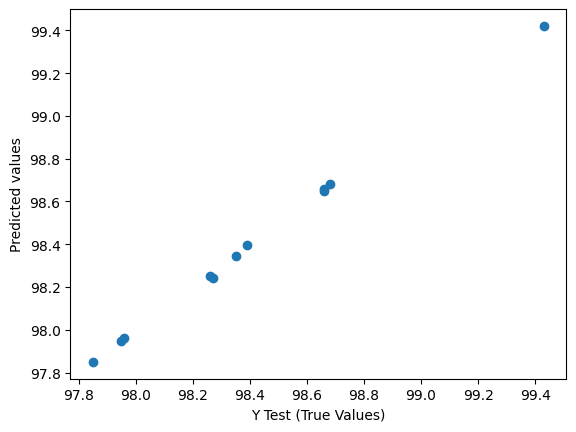

In [139]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

In [140]:
metrics.explained_variance_score(Y_test,pred)

0.9995755453195753